In [1]:
import numpy as np
import pandas as pd
import subprocess
from matplotlib import pyplot as plt

In [3]:
label = 'wave';
# pids_str = subprocess.check_output(['find',f'/data/apc/cold_R0/{label}','-name','*.log']).decode('utf-8');
pids_str = subprocess.check_output(['find',f'.','-name','*.log']).decode('utf-8');
pids = [int(p.split('/')[-1].split('.')[0]) for p in pids_str.split()]

In [4]:
df = pd.DataFrame();

In [5]:
for pid in pids:
    # cur = pd.read_csv(f'/data/apc/cold_R0/{label}/{pid}.log',header=None);
    cur = pd.read_csv(f'{pid}.log',header=None);
    cur[26] = pid;
    df = pd.concat([df, cur], ignore_index=True);

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,26
0,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,3.029830,-0.389731,-2.364284,2.188209,...,-2.827120,1.640316,1.313121,1.656224,0.432003,42,447,4617,1250,196525
1,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-0.421798,2.635808,0.909224,-0.882481,...,-2.225731,-0.030206,-2.827896,0.054262,-2.303785,35,448,3766,1292,196525
2,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,1.941482,-0.045815,1.551780,-0.776701,...,2.264424,-0.545714,-0.493782,-2.989358,0.809182,118,506,3945,1419,196525
3,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,2.989964,-1.693211,0.299599,-1.034334,...,-1.856220,0.753385,2.684718,2.750389,2.718463,73,464,4857,1442,196525
4,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,0.556458,0.396536,-2.810652,-1.378738,...,2.667560,0.028540,1.955017,1.401002,2.084145,17,422,5186,1463,196525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-2.461470,1.341193,1.806351,1.835192,...,-0.045760,-1.331557,2.522550,-2.195093,2.228305,0,240,6,666,196525
21450,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-2.507219,1.514234,1.687707,1.685854,...,-0.052025,-1.364783,2.184884,-2.180350,2.218836,6,256,340,743,196525
21451,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-2.484270,1.435269,1.685626,1.708177,...,-0.051973,-1.362127,2.193645,-2.185880,2.220863,5,253,264,738,196525
21452,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-2.464797,1.336684,1.832801,1.825478,...,-0.042176,-1.325274,2.532352,-2.197480,2.234072,0,240,0,679,196525


In [109]:
#row = 21778
#print(f'offset={list(df.iloc[row][0:6])};')
#print(f'angles={list(df.iloc[row][6:21])};')

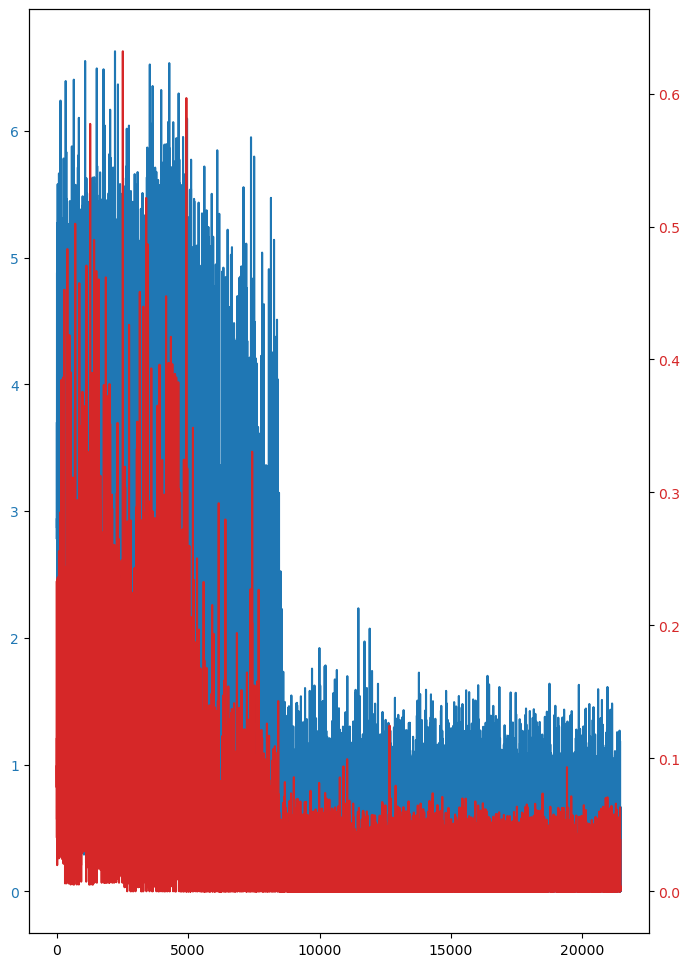

In [9]:
fig,axes = plt.subplots(len(pids),1,figsize=(8,12),sharex=True)
for i,pid in enumerate(pids):
    dg = df[df[26] == pid];
    ax1 = axes;
    #ax1.set_xlim((550,650));
    ax2 = ax1.twinx();
    ax1.plot(list(dg[23]/dg[24]),'C0');
    ax1.tick_params(axis='y', labelcolor='C0');
    ax2.plot(list(dg[21]/dg[22]),'C3');
    ax2.tick_params(axis='y', labelcolor='C3');

In [10]:
df[df[26] == pids[0]].iloc[620:625]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,26
620,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-1.295378,0.130719,-0.226148,-0.257508,...,-0.199902,-0.340629,1.987219,-1.520557,2.034163,59,731,8052,2166,196525
621,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-1.354648,0.583856,0.188837,0.355781,...,0.248131,-0.905300,-0.142621,-2.018617,2.950296,60,440,4458,1462,196525
622,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-2.315372,1.697878,0.375612,2.274064,...,-2.803459,-1.260705,0.337318,-2.259418,2.728914,27,632,3469,1891,196525
623,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-2.542193,1.542520,1.507125,2.131325,...,-0.575433,-1.546485,2.516912,-2.243382,2.113719,11,370,1689,980,196525
624,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-1.995334,1.583524,1.492079,1.657693,...,-2.882936,-2.055877,0.133761,-2.712614,2.871320,100,596,4631,1824,196525


In [11]:
df[27] = 2*df[21]/df[22]+df[23]/df[24]

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,26,27
0,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,3.029830,-0.389731,-2.364284,2.188209,...,1.640316,1.313121,1.656224,0.432003,42,447,4617,1250,196525,3.881519
1,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-0.421798,2.635808,0.909224,-0.882481,...,-0.030206,-2.827896,0.054262,-2.303785,35,448,3766,1292,196525,3.071111
2,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,1.941482,-0.045815,1.551780,-0.776701,...,-0.545714,-0.493782,-2.989358,0.809182,118,506,3945,1419,196525,3.246530
3,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,2.989964,-1.693211,0.299599,-1.034334,...,0.753385,2.684718,2.750389,2.718463,73,464,4857,1442,196525,3.682894
4,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,0.556458,0.396536,-2.810652,-1.378738,...,0.028540,1.955017,1.401002,2.084145,17,422,5186,1463,196525,3.625340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-2.461470,1.341193,1.806351,1.835192,...,-1.331557,2.522550,-2.195093,2.228305,0,240,6,666,196525,0.009009
21450,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-2.507219,1.514234,1.687707,1.685854,...,-1.364783,2.184884,-2.180350,2.218836,6,256,340,743,196525,0.504479
21451,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-2.484270,1.435269,1.685626,1.708177,...,-1.362127,2.193645,-2.185880,2.220863,5,253,264,738,196525,0.397249
21452,0.670667,0.435484,0.73423,0.983867,0.318673,0.069004,-2.464797,1.336684,1.832801,1.825478,...,-1.325274,2.532352,-2.197480,2.234072,0,240,0,679,196525,0.000000


In [ ]:
# TODO: verify MC transition probability
jump_probs
for row in df.iterrows():
    print(row[1]);